# Python On Resonance (PyOR)
## Everybody can simulate NMR

Author: Vineeth Thalakottoor 

Email: vineethfrancis.physics@gmail.com

## Why to develop PyOR when there are a lot of NMR simulation packages available? Why to reinvent the wheel?
The short answer: "The Pleasure of Finding Things Out" . 

## Why Python??
The answer is: it's free.

## What is the purpose of this NMR Simulation tutorial?

Since it will take some time for me to make public the source code of PyOR, I taught to start a series of small NMR simulation tutorials so that the you (audience) can learn how to use PyOR to simulate NMR experiments when I upload the beta version (source code will be hidden) and first version later (source code will be open) in github. 

And I want to show simulating NMR experiment from scratch can be really fun.

## Tutorial 1: Spin Operators for Single spin
If you ask me what is the heart of PyOR?, my answer is the function which generate Spin Operators, "SpinOperator()". "SpinOperator()" can generate spin operators of a NMR system with any number of spins (if your pc support you) with any spin quantum number. This is my favorite function and any one can code it easly if you have a introductory quantum mechanics book. 

With Spin Operators defiend, half the job is done. Let begin.

## Load Python packages and define path to the source file "PythonOnResonance.py"

In [31]:
pathSource = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_G/Source'

In [32]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append(pathSource)

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

## Generating Spin System

In [33]:
"""
Define Spin quantum numbers of your spins
""";

Slist1 = [2]

"""
Try also
Slist1 = [1/2]
Slist1 = [1]
Slist1 = [3/2]
Slist1 = [2]
Slist1 = [5/2]
So on ...
and compare with results in: 
https://easyspin.org/easyspin/documentation/spinoperators.html
""";

In [34]:
"""
Define Planck constant equals 1. 
Because NMR spectroscopists are more interested to write Energy in frequency units. 
if False then hbarEQ1 = hbar
""";

hbarEQ1 = True

In [35]:
"""
Generate Spin Operators
""";

System = PyOR.Numerical_MR(Slist1,hbarEQ1)

"""
Sx, Sy and Sz Operators
""";
Sx,Sy,Sz = System.SpinOperator()

"""
S+ and S- Operators
""";
Sp,Sm = System.PMoperators(Sx,Sy)

## Information about the functions

In [36]:
help(System.SpinOperator)

Help on method SpinOperator in module PythonOnResonance:

SpinOperator() method of PythonOnResonance.Numerical_MR instance
    Generate spin operators for all spins: Sx, Sy and Sz
    INPUT
    -----
    nill
    
    OUTPUT
    ------
    Sx : array [Sx of spin 1, Sx of spin 2, Sx of spin 3, ...]
    Sy : array [Sy of spin 1, Sy of spin 2, Sy of spin 3, ...]
    Sz : array [Sz of spin 1, Sz of spin 2, Sz of spin 3, ...]



In [37]:
help(System.PMoperators)

Help on method PMoperators in module PythonOnResonance:

PMoperators(Sx, Sy) method of PythonOnResonance.Numerical_MR instance
    Generate spin operators for all spins: Sp (Sx + j Sy) and Sm (Sx - j Sy)
    INPUT
    -----
    Sx, Sy
    
    OUTPUT
    ------
    Sp : array [Sp of spin 1, Sp of spin 2, Sp of spin 3, ...]
    Sm : array [Sm of spin 1, Sm of spin 2, Sm of spin 3, ...]



## Representation of Spin Operators

In PyOR you visualize a matrix (Hamitonians, Density matrix and Operators) in various forms.

In [38]:
"""
Matrix represenatation (numpy)
""";
print("Sx = ", Sx)
print("Sy = ", Sx)
print("Sz = ", Sx)
print("Sp = ", Sp)
print("Sm = ", Sm)

Sx =  [[[0.        +0.j 1.        +0.j 0.        +0.j 0.        +0.j
   0.        +0.j]
  [1.        +0.j 0.        +0.j 1.22474487+0.j 0.        +0.j
   0.        +0.j]
  [0.        +0.j 1.22474487+0.j 0.        +0.j 1.22474487+0.j
   0.        +0.j]
  [0.        +0.j 0.        +0.j 1.22474487+0.j 0.        +0.j
   1.        +0.j]
  [0.        +0.j 0.        +0.j 0.        +0.j 1.        +0.j
   0.        +0.j]]]
Sy =  [[[0.        +0.j 1.        +0.j 0.        +0.j 0.        +0.j
   0.        +0.j]
  [1.        +0.j 0.        +0.j 1.22474487+0.j 0.        +0.j
   0.        +0.j]
  [0.        +0.j 1.22474487+0.j 0.        +0.j 1.22474487+0.j
   0.        +0.j]
  [0.        +0.j 0.        +0.j 1.22474487+0.j 0.        +0.j
   1.        +0.j]
  [0.        +0.j 0.        +0.j 0.        +0.j 1.        +0.j
   0.        +0.j]]]
Sz =  [[[0.        +0.j 1.        +0.j 0.        +0.j 0.        +0.j
   0.        +0.j]
  [1.        +0.j 0.        +0.j 1.22474487+0.j 0.        +0.j
   0.        

In [39]:
"""
Matrix represenatation (Sympy)
In Sx[0], 0 means the index of the spin (0th spin or first spin). 
""";
Matrix(Sx[0])

Matrix([
[  0,              1.0,                0,                0,   0],
[1.0,                0, 1.22474487139159,                0,   0],
[  0, 1.22474487139159,                0, 1.22474487139159,   0],
[  0,                0, 1.22474487139159,                0, 1.0],
[  0,                0,                0,              1.0,   0]])

In [40]:
Matrix(Sy[0])

Matrix([
[    0,             -1.0*I,                   0,                   0,      0],
[1.0*I,                  0, -1.22474487139159*I,                   0,      0],
[    0, 1.22474487139159*I,                   0, -1.22474487139159*I,      0],
[    0,                  0,  1.22474487139159*I,                   0, -1.0*I],
[    0,                  0,                   0,               1.0*I,      0]])

In [41]:
Matrix(Sz[0])

Matrix([
[2.0,   0, 0,    0,    0],
[  0, 1.0, 0,    0,    0],
[  0,   0, 0,    0,    0],
[  0,   0, 0, -1.0,    0],
[  0,   0, 0,    0, -2.0]])

In [42]:
Matrix(Sp[0])

Matrix([
[0, 2.0,                0,                0,   0],
[0,   0, 2.44948974278318,                0,   0],
[0,   0,                0, 2.44948974278318,   0],
[0,   0,                0,                0, 2.0],
[0,   0,                0,                0,   0]])

In [43]:
Matrix(Sm[0])

Matrix([
[  0,                0,                0,   0, 0],
[2.0,                0,                0,   0, 0],
[  0, 2.44948974278318,                0,   0, 0],
[  0,                0, 2.44948974278318,   0, 0],
[  0,                0,                0, 2.0, 0]])

<IPython.core.display.Javascript object>


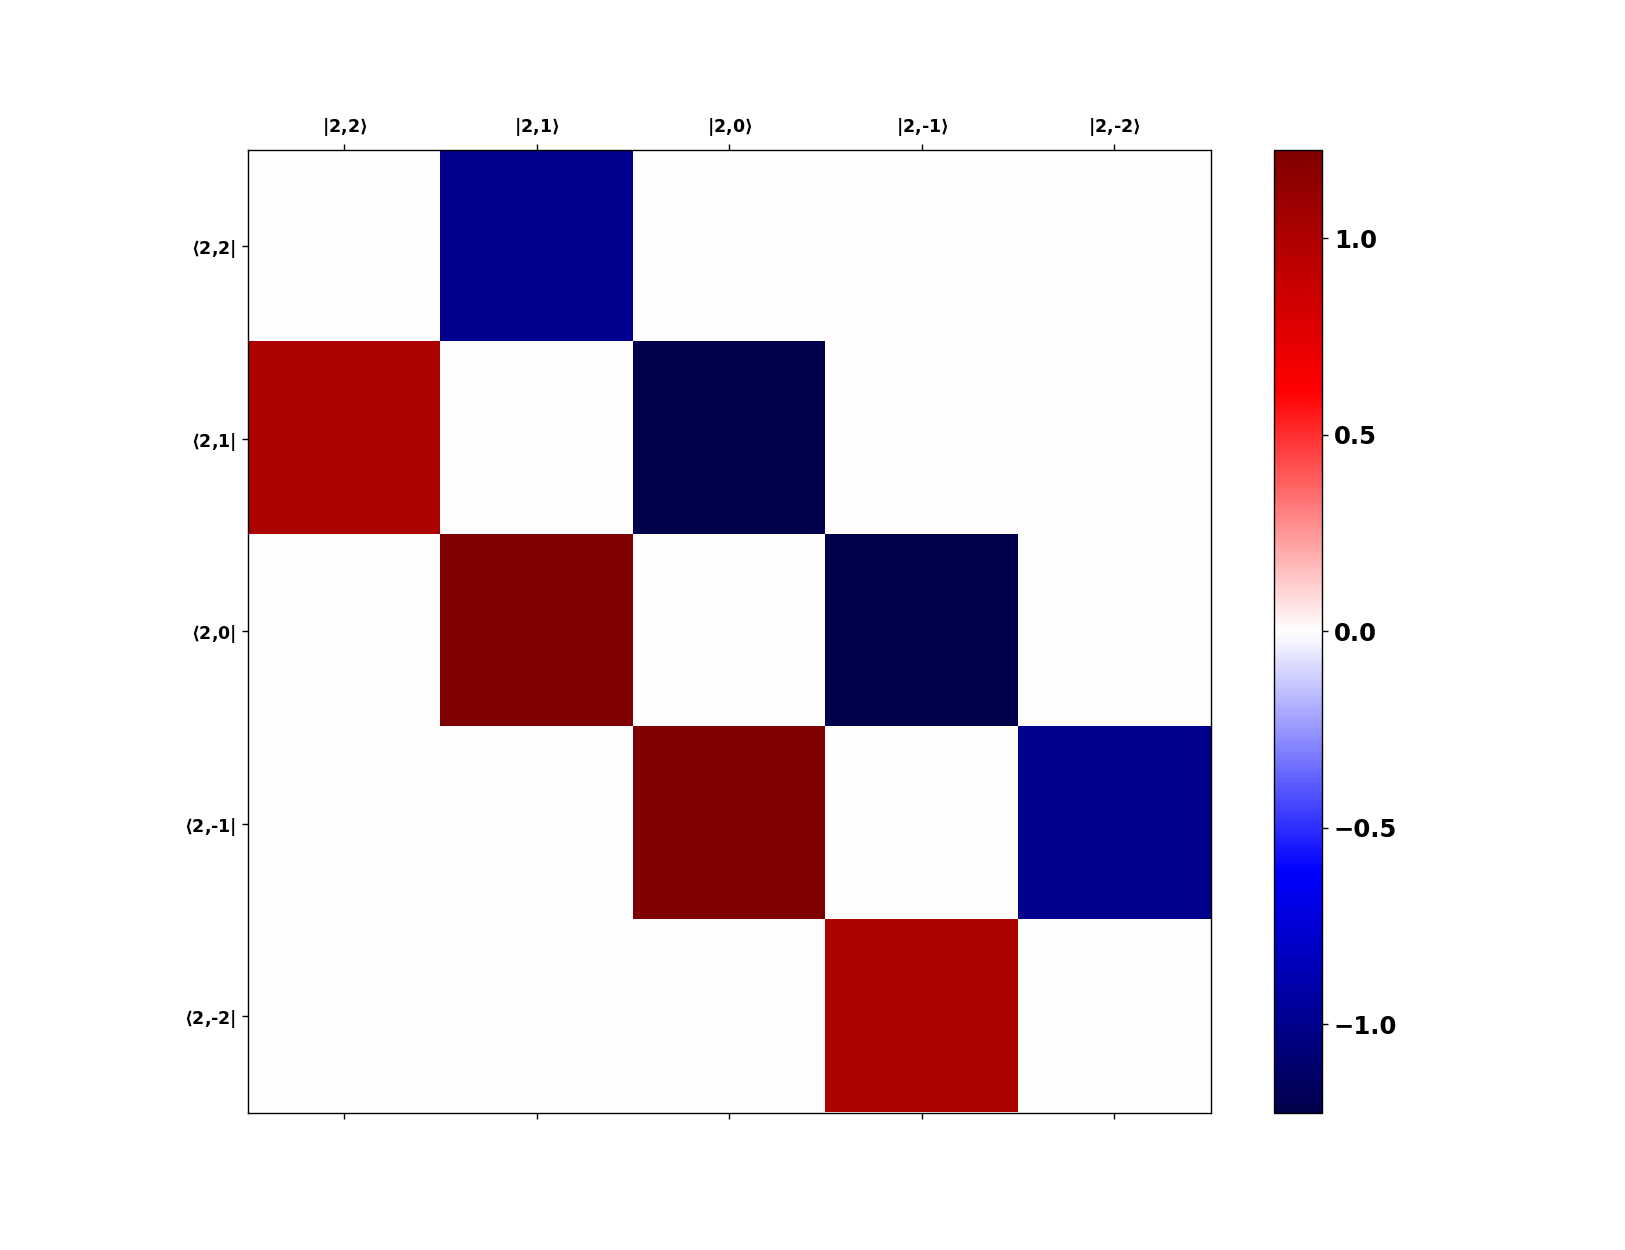

In [44]:
"""
Matrix Represenatation (matplotlib)
""";
System.PlotLabel_Hilbert = True
System.MatrixPlot(1,Sy[0].imag)

<IPython.core.display.Javascript object>


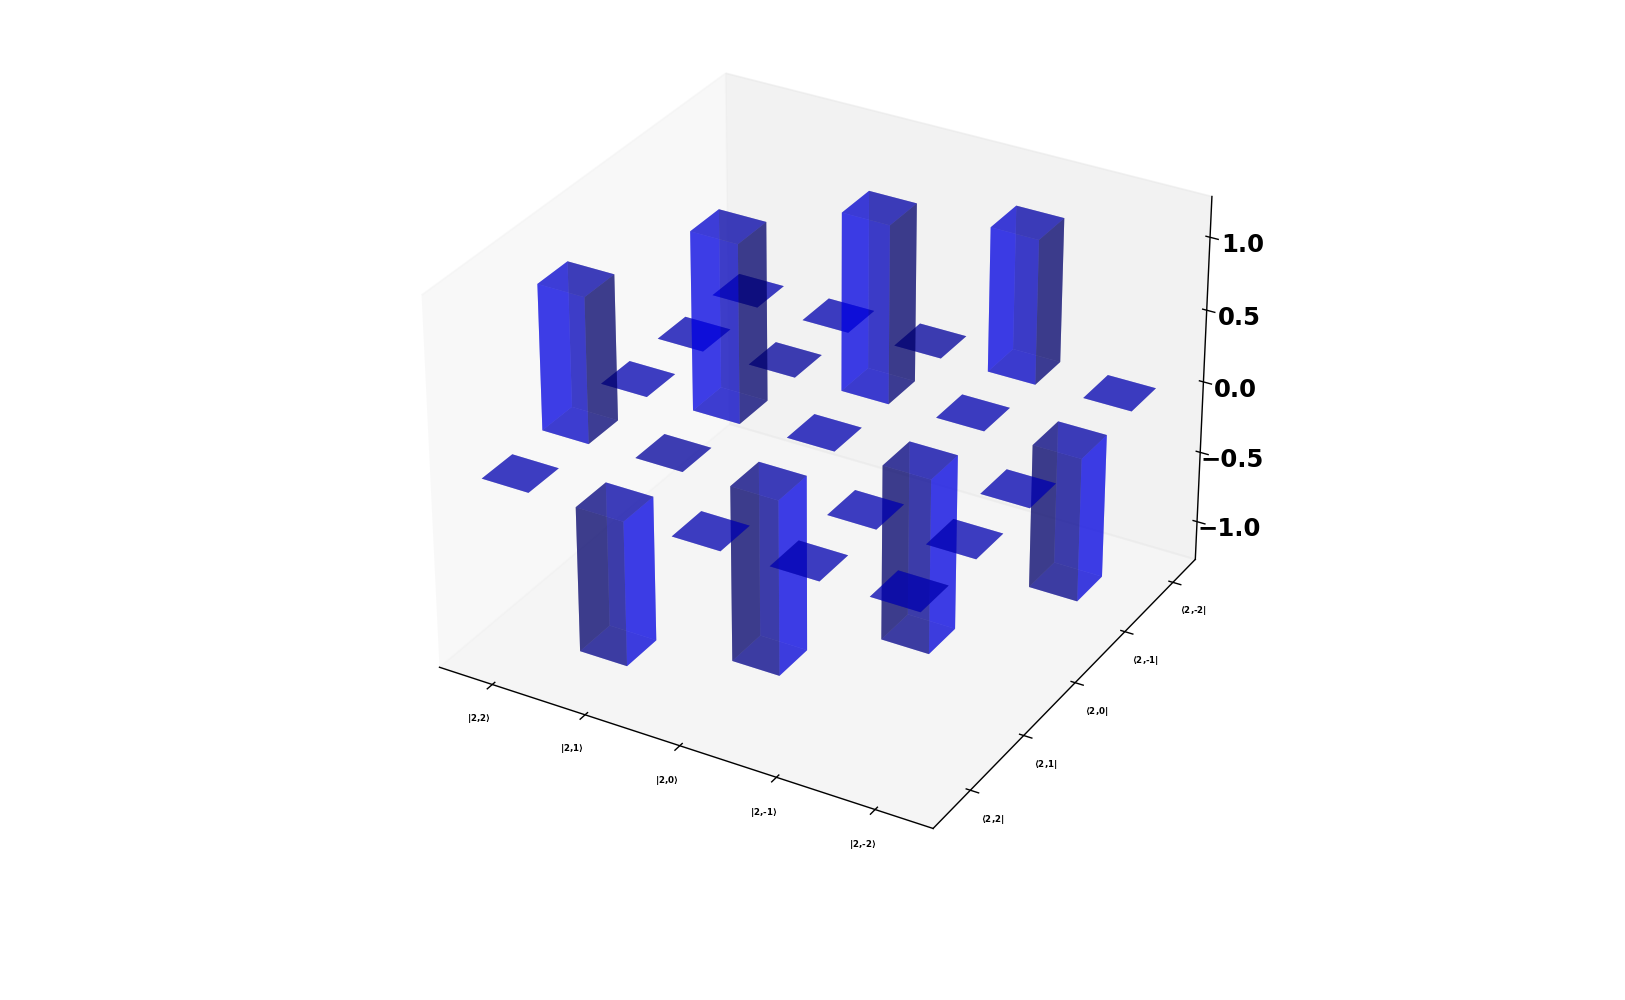

In [45]:
"""
Matrix 3D Represenatation (matplotlib)
""";

System.MatrixPlot3D(2,Sy[0].imag)

## Next lecture: Spin Operators for multi spin system
In this lecture you will see how to use Spin Operators more clearly

## Any suggestion? write to me
vineethfrancis.physics@gmail.com